In [1]:
import pandas as pd
import duckdb

In [2]:
ruta_absoluta = '/home/agustincepeda1/buckets/b1/datasets/dataset_con_clase_ternaria.csv.gz'

# Suponiendo que tu dataset se llama 'clientes_churn.csv'
con = duckdb.connect(database=':memory:', read_only=False)

con.execute(f"""
    CREATE OR REPLACE TABLE clientes_churn AS 
    SELECT * FROM read_csv_auto('{ruta_absoluta}', header=True);
""")

# Mostrar las primeras filas para verificar
print(con.execute("SELECT * FROM clientes_churn LIMIT 5;").fetchdf())

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

   numero_de_cliente  foto_mes  active_quarter  cliente_vip  internet  \
0          250149174    201901               1            0         0   
1          252045720    201901               1            0         0   
2          254876531    201901               1            0         1   
3          256785538    201901               1            0         0   
4          258845364    201901               1            0         1   

   cliente_edad  cliente_antiguedad  mrentabilidad  mrentabilidad_annual  \
0            55                 296         464.44              31108.76   
1            75                 251         888.71               9787.31   
2            49                  53        1964.85              18571.31   
3            67                 117         663.04              43899.63   
4            65                 258         732.51              36029.59   

   mcomisiones  ...  Visa_fultimo_cierre  Visa_mpagado  Visa_mpagospesos  \
0      1497.55  ...         

In [3]:
# Conectado a DuckDB como 'con'
columnas_df = con.execute("PRAGMA table_info('clientes_churn');").fetchdf()

# El resultado 'columnas_df' tendrá columnas como 'name' (nombre de la columna)
print(columnas_df[['name', 'type']])


# 2. Extraer solo los nombres de las columnas en una lista de Python
nombres_columnas = columnas_df['name'].tolist()

print("✅ Lista de todas las columnas en el dataset:")
print(nombres_columnas)

                        name     type
0          numero_de_cliente   BIGINT
1                   foto_mes   BIGINT
2             active_quarter   BIGINT
3                cliente_vip   BIGINT
4                   internet   BIGINT
..                       ...      ...
150       Visa_mconsumototal   DOUBLE
151           Visa_cconsumos   BIGINT
152  Visa_cadelantosefectivo   BIGINT
153         Visa_mpagominimo   DOUBLE
154           clase_ternaria  VARCHAR

[155 rows x 2 columns]
✅ Lista de todas las columnas en el dataset:
['numero_de_cliente', 'foto_mes', 'active_quarter', 'cliente_vip', 'internet', 'cliente_edad', 'cliente_antiguedad', 'mrentabilidad', 'mrentabilidad_annual', 'mcomisiones', 'mactivos_margen', 'mpasivos_margen', 'cproductos', 'tcuentas', 'ccuenta_corriente', 'mcuenta_corriente_adicional', 'mcuenta_corriente', 'ccaja_ahorro', 'mcaja_ahorro', 'mcaja_ahorro_adicional', 'mcaja_ahorro_dolares', 'cdescubierto_preacordado', 'mcuentas_saldo', 'ctarjeta_debito', 'ctarjeta_debito_t

In [4]:
# 1. Tu lista de columnas
columnas_totales = ['numero_de_cliente', 'foto_mes', 'active_quarter', 'cliente_vip', 'internet', 'cliente_edad', 'cliente_antiguedad', 'mrentabilidad', 'mrentabilidad_annual', 'mcomisiones', 'mactivos_margen', 'mpasivos_margen', 'cproductos', 'tcuentas', 'ccuenta_corriente', 'mcuenta_corriente_adicional', 'mcuenta_corriente', 'ccaja_ahorro', 'mcaja_ahorro', 'mcaja_ahorro_adicional', 'mcaja_ahorro_dolares', 'cdescubierto_preacordado', 'mcuentas_saldo', 'ctarjeta_debito', 'ctarjeta_debito_transacciones', 'mautoservicio', 'ctarjeta_visa', 'ctarjeta_visa_transacciones', 'mtarjeta_visa_consumo', 'ctarjeta_master', 'ctarjeta_master_transacciones', 'mtarjeta_master_consumo', 'cprestamos_personales', 'mprestamos_personales', 'cprestamos_prendarios', 'mprestamos_prendarios', 'cprestamos_hipotecarios', 'mprestamos_hipotecarios', 'cplazo_fijo', 'mplazo_fijo_dolares', 'mplazo_fijo_pesos', 'cinversion1', 'minversion1_pesos', 'minversion1_dolares', 'cinversion2', 'minversion2', 'cseguro_vida', 'cseguro_auto', 'cseguro_vivienda', 'cseguro_accidentes_personales', 'ccaja_seguridad', 'cpayroll_trx', 'mpayroll', 'mpayroll2', 'cpayroll2_trx', 'ccuenta_debitos_automaticos', 'mcuenta_debitos_automaticos', 'ctarjeta_visa_debitos_automaticos', 'mttarjeta_visa_debitos_automaticos', 'ctarjeta_master_debitos_automaticos', 'mttarjeta_master_debitos_automaticos', 'cpagodeservicios', 'mpagodeservicios', 'cpagomiscuentas', 'mpagomiscuentas', 'ccajeros_propios_descuentos', 'mcajeros_propios_descuentos', 'ctarjeta_visa_descuentos', 'mtarjeta_visa_descuentos', 'ctarjeta_master_descuentos', 'mtarjeta_master_descuentos', 'ccomisiones_mantenimiento', 'mcomisiones_mantenimiento', 'ccomisiones_otras', 'mcomisiones_otras', 'cforex', 'cforex_buy', 'mforex_buy', 'cforex_sell', 'mforex_sell', 'ctransferencias_recibidas', 'mtransferencias_recibidas', 'ctransferencias_emitidas', 'mtransferencias_emitidas', 'cextraccion_autoservicio', 'mextraccion_autoservicio', 'ccheques_depositados', 'mcheques_depositados', 'ccheques_emitidos', 'mcheques_emitidos', 'ccheques_depositados_rechazados', 'mcheques_depositados_rechazados', 'ccheques_emitidos_rechazados', 'mcheques_emitidos_rechazados', 'tcallcenter', 'ccallcenter_transacciones', 'thomebanking', 'chomebanking_transacciones', 'ccajas_transacciones', 'ccajas_consultas', 'ccajas_depositos', 'ccajas_extracciones', 'ccajas_otras', 'catm_trx', 'matm', 'catm_trx_other', 'matm_other', 'ctrx_quarter', 'tmobile_app', 'cmobile_app_trx', 'Master_delinquency', 'Master_status', 'Master_mfinanciacion_limite', 'Master_Fvencimiento', 'Master_Finiciomora', 'Master_msaldototal', 'Master_msaldopesos', 'Master_msaldodolares', 'Master_mconsumospesos', 'Master_mconsumosdolares', 'Master_mlimitecompra', 'Master_madelantopesos', 'Master_madelantodolares', 'Master_fultimo_cierre', 'Master_mpagado', 'Master_mpagospesos', 'Master_mpagosdolares', 'Master_fechaalta', 'Master_mconsumototal', 'Master_cconsumos', 'Master_cadelantosefectivo', 'Master_mpagominimo', 'Visa_delinquency', 'Visa_status', 'Visa_mfinanciacion_limite', 'Visa_Fvencimiento', 'Visa_Finiciomora', 'Visa_msaldototal', 'Visa_msaldopesos', 'Visa_msaldodolares', 'Visa_mconsumospesos', 'Visa_mconsumosdolares', 'Visa_mlimitecompra', 'Visa_madelantopesos', 'Visa_madelantodolares', 'Visa_fultimo_cierre', 'Visa_mpagado', 'Visa_mpagospesos', 'Visa_mpagosdolares', 'Visa_fechaalta', 'Visa_mconsumototal', 'Visa_cconsumos', 'Visa_cadelantosefectivo', 'Visa_mpagominimo', 'clase_ternaria']

# 2. Definir las columnas a excluir
columnas_a_excluir = ['numero_de_cliente', 'foto_mes', 'clase_ternaria']

# 3. Filtrar las columnas que realmente inspeccionaremos
columnas_a_inspeccionar = [col for col in columnas_totales if col not in columnas_a_excluir]

# 4. Generar las cláusulas SELECT
select_clauses = ["FOTO_MES"] # Empezamos con la columna de agrupamiento

for col in columnas_a_inspeccionar:
    # 4a. Cláusula para Contar Valores Únicos (Detección de Constantes)
    select_clauses.append(f"COUNT(DISTINCT {col}) AS unique_{col}")

    # 4b. Cláusula para Proporción de Ceros (Detección de Meses Rotos)
    # Usamos CAST(... AS REAL) para asegurar la división flotante
    select_clauses.append(f"CAST(SUM(CASE WHEN {col} = 0 THEN 1 ELSE 0 END) AS REAL) / COUNT(*) AS zero_ratio_{col}")

# 5. Unir todas las cláusulas en el query final
query_select = ",\n    ".join(select_clauses)

duckdb_validation_query = f"""
SELECT
    {query_select}
FROM
    clientes_churn
GROUP BY
    FOTO_MES
ORDER BY
    FOTO_MES;
"""

print("--- Query de Validación Generado (DuckDB SQL) ---")
print(duckdb_validation_query)
print("-------------------------------------------------")

--- Query de Validación Generado (DuckDB SQL) ---

SELECT
    FOTO_MES,
    COUNT(DISTINCT active_quarter) AS unique_active_quarter,
    CAST(SUM(CASE WHEN active_quarter = 0 THEN 1 ELSE 0 END) AS REAL) / COUNT(*) AS zero_ratio_active_quarter,
    COUNT(DISTINCT cliente_vip) AS unique_cliente_vip,
    CAST(SUM(CASE WHEN cliente_vip = 0 THEN 1 ELSE 0 END) AS REAL) / COUNT(*) AS zero_ratio_cliente_vip,
    COUNT(DISTINCT internet) AS unique_internet,
    CAST(SUM(CASE WHEN internet = 0 THEN 1 ELSE 0 END) AS REAL) / COUNT(*) AS zero_ratio_internet,
    COUNT(DISTINCT cliente_edad) AS unique_cliente_edad,
    CAST(SUM(CASE WHEN cliente_edad = 0 THEN 1 ELSE 0 END) AS REAL) / COUNT(*) AS zero_ratio_cliente_edad,
    COUNT(DISTINCT cliente_antiguedad) AS unique_cliente_antiguedad,
    CAST(SUM(CASE WHEN cliente_antiguedad = 0 THEN 1 ELSE 0 END) AS REAL) / COUNT(*) AS zero_ratio_cliente_antiguedad,
    COUNT(DISTINCT mrentabilidad) AS unique_mrentabilidad,
    CAST(SUM(CASE WHEN mrentabilidad 

In [5]:
# 6. Ejecutar el query (Necesitas reestablecer 'con' y cargar la tabla)
# Asumiendo que has corregido la carga en el paso anterior y la variable 'con' está activa:
# Si el objeto 'con' no está activo, puedes descomentar y usar estas líneas si la carga falló:
# ruta_absoluta = '/home/agustincepeda1/buckets/b1/datasets/dataset_con_clase_ternaria.csv'
# con = duckdb.connect(database=':memory:', read_only=False)
# con.execute(f"CREATE OR REPLACE TABLE clientes_churn AS SELECT * FROM read_csv_auto('{ruta_absoluta}', header=True);")

print("⏳ Ejecutando el query de validación...")
try:
    validation_df = con.execute(duckdb_validation_query).fetchdf()
    print("✅ Ejecución completada. Primeras filas del reporte de calidad:")
    print(validation_df.head())

    # --- Análisis Rápido ---
    print("\n--- Filas donde hay meses con más del 99% de ceros en alguna variable (ejemplo) ---")
    
    # Crea una condición para filtrar cualquier columna con ratio > 0.99
    zero_filter_conditions = " OR ".join([f"zero_ratio_{col} > 0.99" for col in columnas_a_inspeccionar])
    
    # Filtra el DataFrame de Pandas
    meses_rotos_df = validation_df[validation_df.filter(like='zero_ratio_').gt(0.99).any(axis=1)]
    
    if not meses_rotos_df.empty:
        print(meses_rotos_df)
    else:
        print("No se encontraron meses con más del 99% de ceros en ninguna variable.")

except NameError:
    print("\n⚠️ ERROR: La variable 'con' (conexión a DuckDB) no está definida. Por favor, asegúrate de haber ejecutado el código de carga del dataset exitosamente antes de este paso.")
except Exception as e:
    print(f"\n⚠️ ERROR durante la ejecución del query: {e}")


    

⏳ Ejecutando el query de validación...


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

✅ Ejecución completada. Primeras filas del reporte de calidad:
   foto_mes  unique_active_quarter  zero_ratio_active_quarter  \
0    201901                      2                   0.012408   
1    201902                      2                   0.012073   
2    201903                      2                   0.011995   
3    201904                      2                   0.012660   
4    201905                      2                   0.012626   

   unique_cliente_vip  zero_ratio_cliente_vip  unique_internet  \
0                   2                0.993039                2   
1                   2                0.993094                2   
2                   2                0.993117                2   
3                   2                0.993125                2   
4                   2                0.993137                2   

   zero_ratio_internet  unique_cliente_edad  zero_ratio_cliente_edad  \
0             0.102669                   81                      0.0   
1    

In [6]:
meses_rotos_df

,foto_mes,unique_active_quarter,zero_ratio_active_quarter,unique_cliente_vip,zero_ratio_cliente_vip,unique_internet,zero_ratio_internet,unique_cliente_edad,zero_ratio_cliente_edad,unique_cliente_antiguedad,...,unique_Visa_fechaalta,zero_ratio_Visa_fechaalta,unique_Visa_mconsumototal,zero_ratio_Visa_mconsumototal,unique_Visa_cconsumos,zero_ratio_Visa_cconsumos,unique_Visa_cadelantosefectivo,zero_ratio_Visa_cadelantosefectivo,unique_Visa_mpagominimo,zero_ratio_Visa_mpagominimo
0,201901,2,0.012408,2,0.993039,2,0.102669,81,0.000000,297,...,6009,0.0,91875,0.058943,148,0.058911,15,0.868877,3903,0.144360
1,201902,2,0.012073,2,0.993094,2,0.106219,81,0.000000,298,...,6032,0.0,91421,0.063652,134,0.063604,16,0.866421,3872,0.141626
2,201903,2,0.011995,2,0.993117,2,0.102463,80,0.000000,299,...,6051,0.0,91970,0.059460,129,0.059444,19,0.863567,3617,0.138870
3,201904,2,0.012660,2,0.993125,2,0.102831,80,0.000000,300,...,6072,0.0,94305,0.053446,152,0.053438,20,0.861962,3740,0.142605
4,201905,2,0.012626,2,0.993137,2,0.096775,80,0.000000,301,...,6091,0.0,93291,0.058576,136,0.058490,20,0.862235,3706,0.143858
5,201906,2,0.012887,2,0.993164,2,0.098940,81,0.000000,302,...,6110,0.0,94127,0.057794,134,0.057794,19,0.858794,3957,0.167547
6,201907,2,0.012697,2,0.993107,2,0.096501,80,0.000000,303,...,6137,0.0,97165,0.052983,157,0.052960,21,0.862745,4158,0.145462
7,201908,2,0.013190,2,0.993114,2,0.095253,80,0.000000,304,...,6160,0.0,96245,0.062395,133,0.062379,17,0.860893,4151,0.143163
8,201909,2,0.012874,2,0.993144,2,0.094918,81,0.000000,305,...,6186,0.0,96822,0.064931,133,0.064535,16,0.860022,4332,0.144942
9,201910,2,0.013006,2,0.993236,2,0.092537,81,0.000000,306,...,6207,0.0,100991,0.057224,160,0.057172,17,0.861870,4722,0.141320


In [8]:

# Asumiendo que 'meses_rotos_df' es tu DataFrame de validación

# 1. Conteo de Columnas con 100% Ceros (Zero Ratio = 1.0)
# a. Filtra solo las columnas 'zero_ratio_'
zero_ratio_cols = meses_rotos_df.filter(like='zero_ratio_')
# b. Crea una máscara booleana donde el valor es 1.0
is_zero_broken = (zero_ratio_cols == 1.0)
# c. Suma las TRUE (1s) a lo largo del eje de columnas (axis=1) y asigna a la nueva columna
meses_rotos_df['cero_rotas_count'] = is_zero_broken.sum(axis=1)


# 2. Conteo de Columnas Constantes (Unique Count = 1)
# a. Filtra solo las columnas 'unique_'
unique_cols = meses_rotos_df.filter(like='unique_')
# b. Crea una máscara booleana donde el valor es 1
is_constant = (unique_cols == 1)
# c. Suma las TRUE (1s) a lo largo del eje de columnas (axis=1) y asigna a la nueva columna
meses_rotos_df['constantes_count'] = is_constant.sum(axis=1)


# 3. Mostrar el resumen de las columnas de interés
resumen_final = meses_rotos_df[['foto_mes', 'constantes_count', 'cero_rotas_count']]

print("--- Resumen de Calidad de Datos por foto_mes ---")
print(resumen_final.sort_values(by=['constantes_count', 'cero_rotas_count'], ascending=False).head(30))

--- Resumen de Calidad de Datos por foto_mes ---
    foto_mes  constantes_count  cero_rotas_count
17    202006                47                47
9     201910                14                14
4     201905                 7                 7
13    202002                 6                 6
20    202009                 6                 6
21    202010                 6                 6
25    202102                 6                 6
3     201904                 2                 2
28    202105                 1                 1
0     201901                 0                 0
1     201902                 0                 0
2     201903                 0                 0
5     201906                 0                 0
6     201907                 0                 0
7     201908                 0                 0
8     201909                 0                 0
10    201911                 0                 0
11    201912                 0                 0
12    202001        

Meses rotos = 202006, 201910.

In [10]:
df = pd.read_csv(ruta_absoluta,low_memory=False)

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Suponiendo que tu DataFrame de clientes se llama 'df'
# Renombra 'clase_ternaria' si tu columna target tiene otro nombre.
TARGET_COL = 'clase_ternaria' 

# 1. Agrupar por 'foto_mes' y la columna target, y contar los registros
distribucion_mensual = df.groupby(['foto_mes', TARGET_COL]).size().reset_index(name='Cantidad')

# 2. Pivotear la tabla para tener las categorías del target como columnas, 
# lo cual es ideal para graficar series de tiempo.
distribucion_pivot = distribucion_mensual.pivot(
    index='foto_mes', 
    columns=TARGET_COL, 
    values='Cantidad'
).fillna(0) # Llenar cualquier mes donde una categoría no exista con 0

print("--- Distribución Mensual del Target ---")
print(distribucion_pivot.head())

--- Distribución Mensual del Target ---
clase_ternaria  BAJA+1  BAJA+2  CONTINUA
foto_mes                                
201901           645.0   729.0  122899.0
201902           733.0   707.0  123961.0
201903           708.0   751.0  124508.0
201904           756.0   514.0  125268.0
201905           517.0   692.0  125993.0


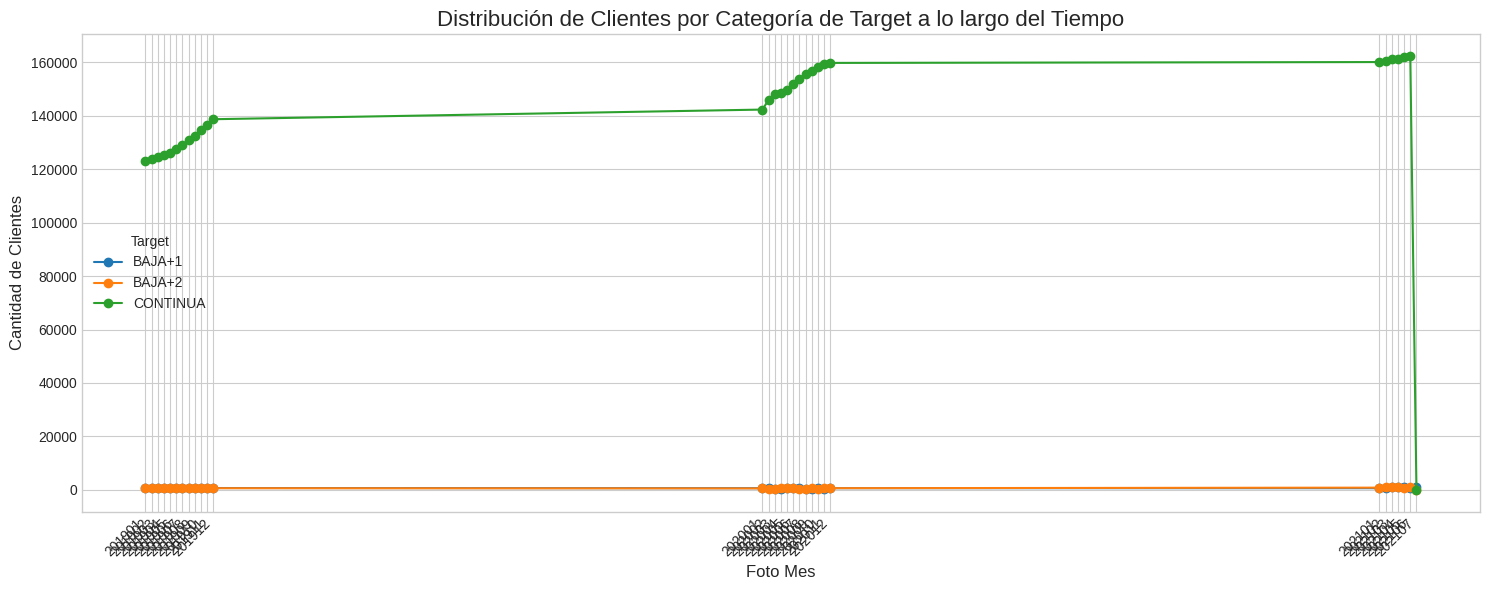

In [12]:
# Configuración del gráfico
plt.figure(figsize=(15, 6))
plt.style.use('seaborn-v0_8-whitegrid')

# Generar el gráfico de líneas
distribucion_pivot.plot(kind='line', marker='o', ax=plt.gca())

# Configuración de Etiquetas y Títulos
plt.title('Distribución de Clientes por Categoría de Target a lo largo del Tiempo', fontsize=16)
plt.xlabel('Foto Mes', fontsize=12)
plt.ylabel('Cantidad de Clientes', fontsize=12)
plt.xticks(
    rotation=45, 
    ha='right', 
    ticks=distribucion_pivot.index, 
    labels=distribucion_pivot.index.astype(str) # Asegura que las etiquetas sean cadenas
)
plt.legend(title='Target')
plt.tight_layout() # Ajusta el diseño para que no se corten las etiquetas
plt.show()

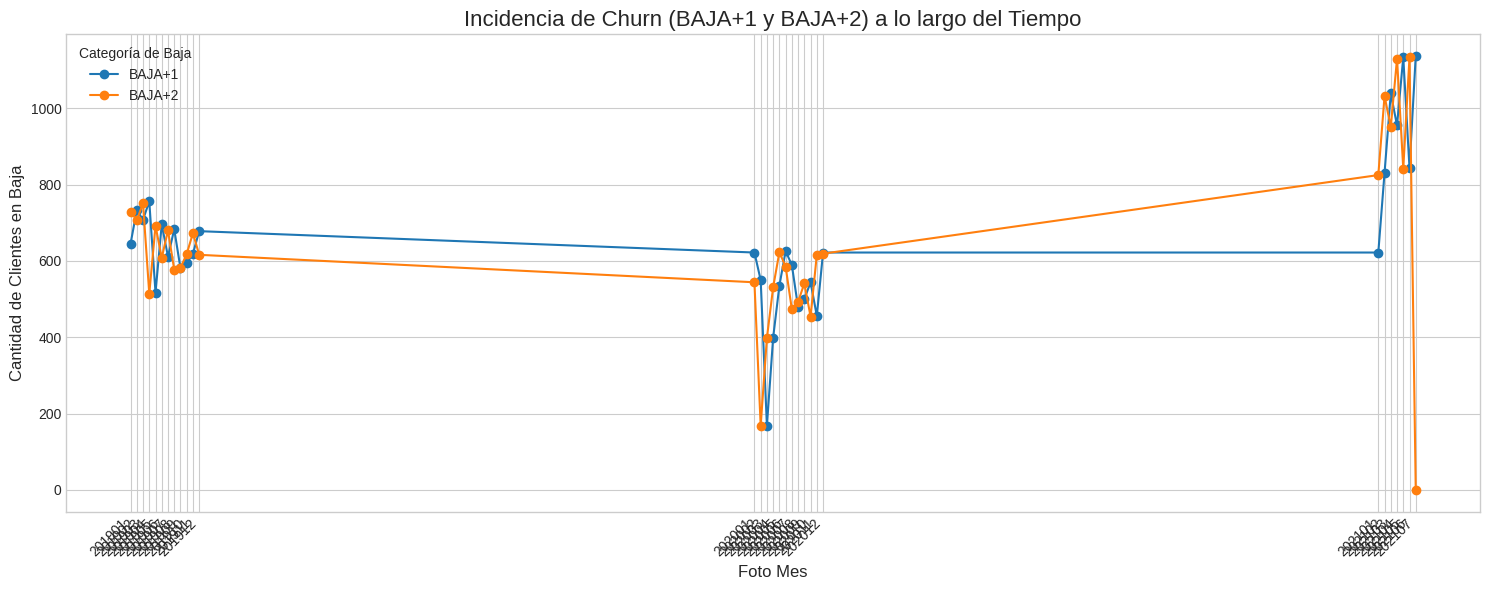

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Suponiendo que 'distribucion_pivot' es el DataFrame pivotado que contiene:
# Índices: foto_mes
# Columnas: BAJA+1, BAJA+2, CONTINUA
# (Si tu DataFrame se llama diferente, ajusta el nombre aquí)

# 1. Seleccionar solo las columnas de interés: BAJA+1 y BAJA+2
bajas_pivot = distribucion_pivot[['BAJA+1', 'BAJA+2']]

# 2. Configuración del gráfico
plt.figure(figsize=(15, 6))
plt.style.use('seaborn-v0_8-whitegrid')

# 3. Generar el gráfico de líneas solo para las bajas
bajas_pivot.plot(kind='line', marker='o', ax=plt.gca())

# 4. Configuración de Etiquetas y Títulos
plt.title('Incidencia de Churn (BAJA+1 y BAJA+2) a lo largo del Tiempo', fontsize=16)
plt.xlabel('Foto Mes', fontsize=12)
plt.ylabel('Cantidad de Clientes en Baja', fontsize=12)
plt.xticks(
    rotation=45, 
    ha='right', 
    ticks=bajas_pivot.index, 
    labels=bajas_pivot.index.astype(str)
)
plt.legend(title='Categoría de Baja')
plt.tight_layout()
plt.show()

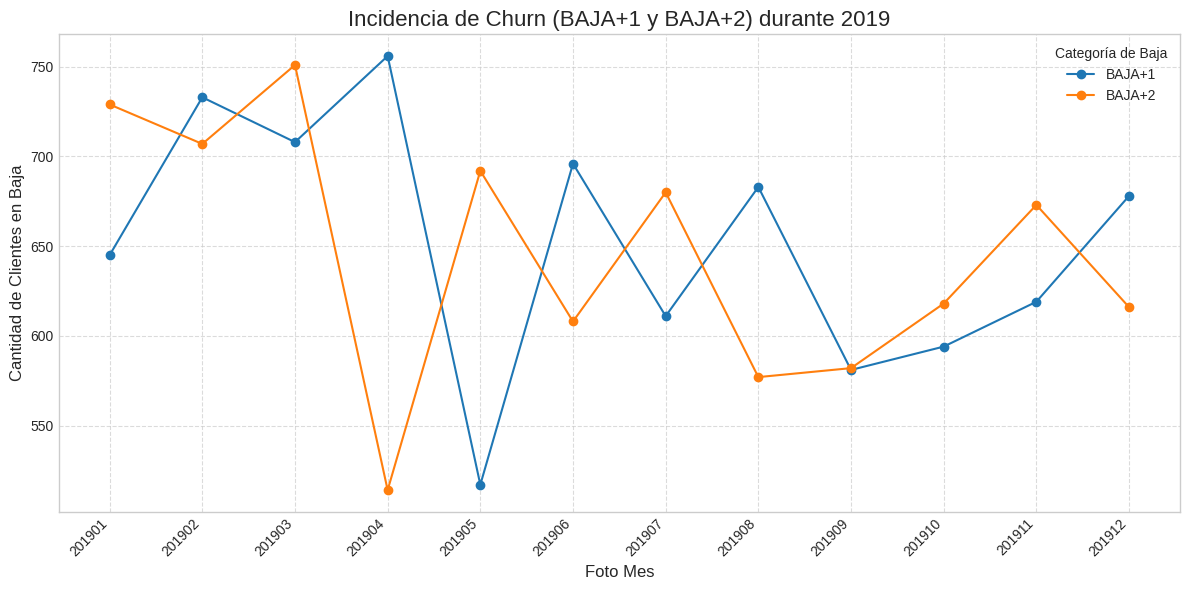

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Asumiendo que 'distribucion_pivot' es el DataFrame pivotado con todas las fotos_mes.
# Si estás usando el resultado del paso anterior, usa 'bajas_pivot'

# 1. Seleccionar solo las columnas de interés: BAJA+1 y BAJA+2 (si no lo hiciste antes)
bajas_pivot = distribucion_pivot[['BAJA+1', 'BAJA+2']]

# 2. Filtrar solo los datos correspondientes al año 2019 (de 201901 a 201912)
# El índice 'foto_mes' debe ser un número o una cadena para que el filtro funcione.
# Usamos .loc para seleccionar el rango de índices
df_2019 = bajas_pivot.loc[201901:201912] 
# Nota: Si tu índice es de tipo string, usa .loc['201901':'201912']

# 3. Configuración del gráfico
plt.figure(figsize=(12, 6))
plt.style.use('seaborn-v0_8-whitegrid')

# 4. Generar el gráfico de líneas solo para el 2019
df_2019.plot(kind='line', marker='o', ax=plt.gca())

# 5. Configuración de Etiquetas y Títulos
plt.title('Incidencia de Churn (BAJA+1 y BAJA+2) durante 2019', fontsize=16)
plt.xlabel('Foto Mes', fontsize=12)
plt.ylabel('Cantidad de Clientes en Baja', fontsize=12)

# Ajustar las etiquetas del eje X para que sean legibles y correspondan al 2019
plt.xticks(
    rotation=45, 
    ha='right', 
    ticks=df_2019.index, 
    labels=df_2019.index.astype(str)
)

plt.legend(title='Categoría de Baja')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

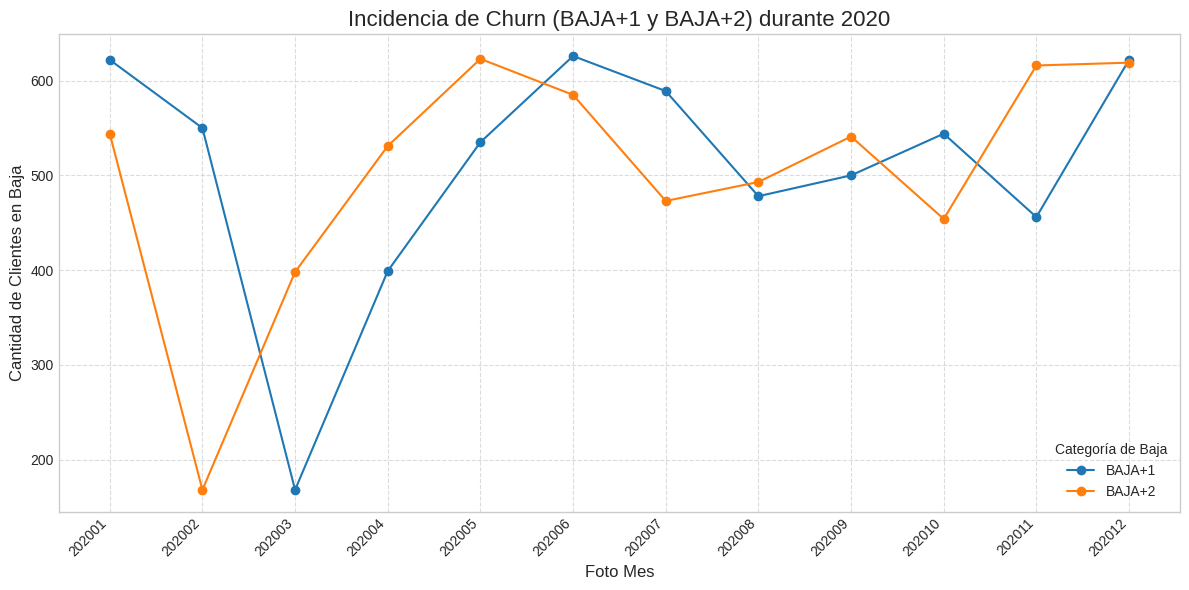

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Asumiendo que 'distribucion_pivot' es el DataFrame pivotado con todas las fotos_mes.
# 1. Seleccionar solo las columnas de interés: BAJA+1 y BAJA+2
bajas_pivot = distribucion_pivot[['BAJA+1', 'BAJA+2']]

# 2. Filtrar solo los datos correspondientes al año 2020 (de 202001 a 202012)
# Usamos .loc para seleccionar el rango de índices.
df_2020 = bajas_pivot.loc[202001:202012] 
# Nota: Si tu índice 'foto_mes' es de tipo string, usa .loc['202001':'202012']

# 3. Configuración del gráfico
plt.figure(figsize=(12, 6))
plt.style.use('seaborn-v0_8-whitegrid')

# 4. Generar el gráfico de líneas solo para el 2020
df_2020.plot(kind='line', marker='o', ax=plt.gca())

# 5. Configuración de Etiquetas y Títulos
plt.title('Incidencia de Churn (BAJA+1 y BAJA+2) durante 2020', fontsize=16)
plt.xlabel('Foto Mes', fontsize=12)
plt.ylabel('Cantidad de Clientes en Baja', fontsize=12)

# Ajustar las etiquetas del eje X para que sean legibles y correspondan al 2020
plt.xticks(
    rotation=45, 
    ha='right', 
    ticks=df_2020.index, 
    labels=df_2020.index.astype(str)
)

plt.legend(title='Categoría de Baja')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

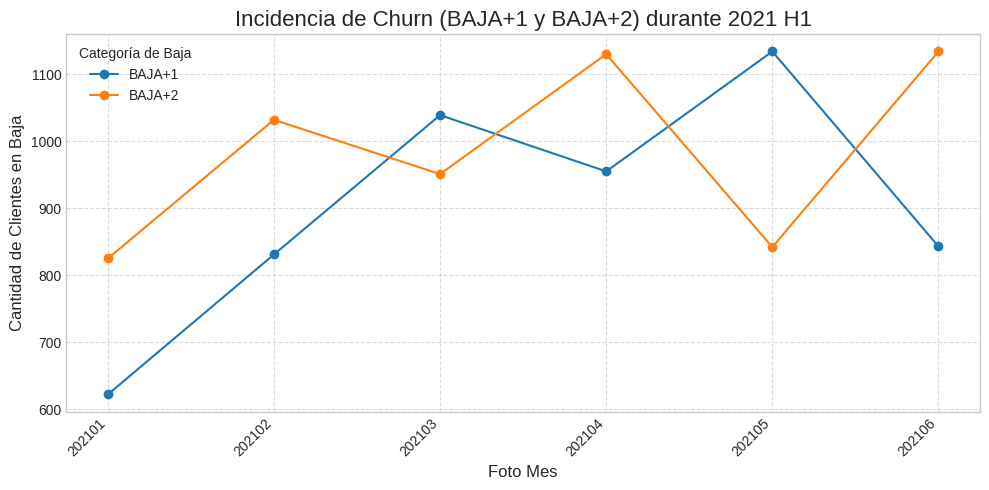

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Asumiendo que 'distribucion_pivot' es el DataFrame pivotado con todas las fotos_mes.
# 1. Seleccionar solo las columnas de interés: BAJA+1 y BAJA+2
bajas_pivot = distribucion_pivot[['BAJA+1', 'BAJA+2']]

# 2. Filtrar solo los datos correspondientes al primer semestre de 2021
# Usamos .loc para seleccionar el rango de índices.
df_2021_h1 = bajas_pivot.loc[202101:202106] 
# Nota: Si tu índice 'foto_mes' es de tipo string, usa .loc['202101':'202106']

# 3. Configuración del gráfico
plt.figure(figsize=(10, 5))
plt.style.use('seaborn-v0_8-whitegrid')

# 4. Generar el gráfico de líneas solo para 2021 H1
df_2021_h1.plot(kind='line', marker='o', ax=plt.gca())

# 5. Configuración de Etiquetas y Títulos
plt.title('Incidencia de Churn (BAJA+1 y BAJA+2) durante 2021 H1', fontsize=16)
plt.xlabel('Foto Mes', fontsize=12)
plt.ylabel('Cantidad de Clientes en Baja', fontsize=12)

# Ajustar las etiquetas del eje X para que sean legibles y correspondan al 2021 H1
plt.xticks(
    rotation=45, 
    ha='right', 
    ticks=df_2021_h1.index, 
    labels=df_2021_h1.index.astype(str)
)

plt.legend(title='Categoría de Baja')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

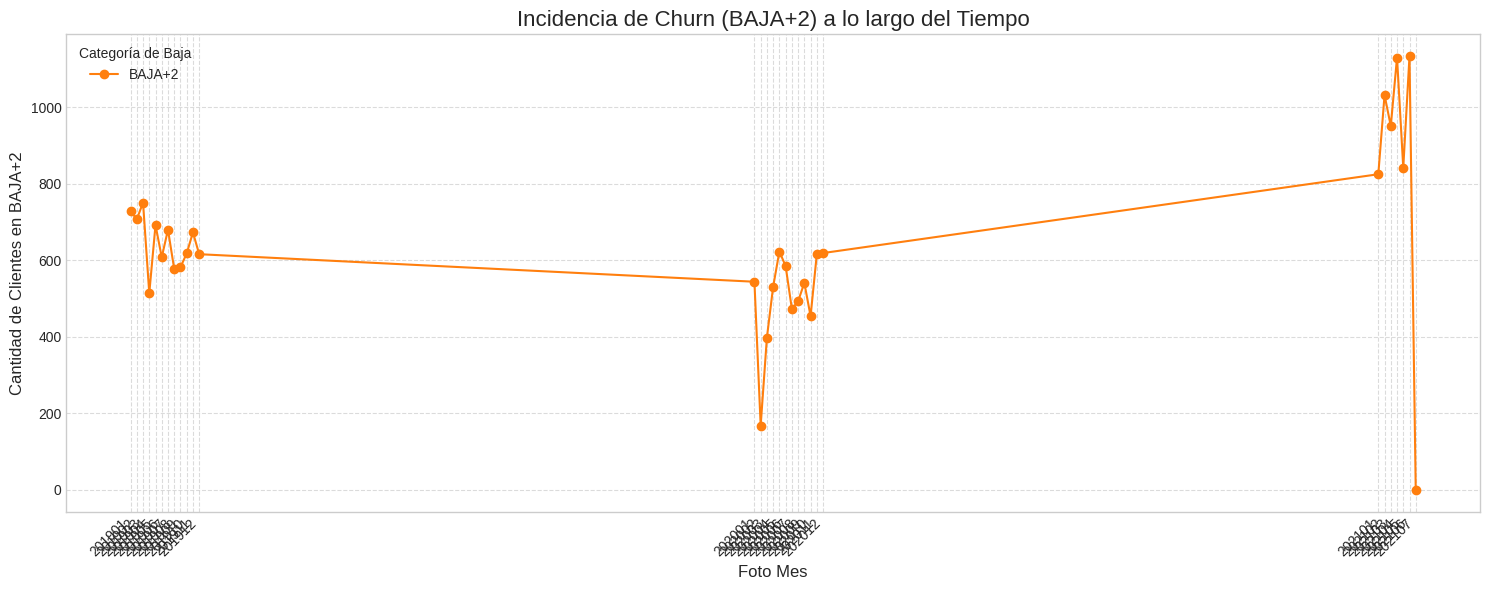

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Asumiendo que 'distribucion_pivot' es el DataFrame pivotado con todas las fotos_mes.
# 1. Seleccionar solo la columna de interés: BAJA+2
baja_2_pivot = distribucion_pivot[['BAJA+2']]

# 2. Configuración del gráfico
plt.figure(figsize=(15, 6))
plt.style.use('seaborn-v0_8-whitegrid')

# 3. Generar el gráfico de líneas solo para BAJA+2
baja_2_pivot.plot(kind='line', marker='o', ax=plt.gca(), color='tab:orange') # Usamos un color específico

# 4. Configuración de Etiquetas y Títulos
plt.title('Incidencia de Churn (BAJA+2) a lo largo del Tiempo', fontsize=16)
plt.xlabel('Foto Mes', fontsize=12)
plt.ylabel('Cantidad de Clientes en BAJA+2', fontsize=12)

# Ajustar las etiquetas del eje X para que sean legibles
plt.xticks(
    rotation=45, 
    ha='right', 
    ticks=baja_2_pivot.index, 
    labels=baja_2_pivot.index.astype(str)
)

plt.legend(title='Categoría de Baja') # La leyenda ahora solo mostrará BAJA+2
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()